<a href="https://colab.research.google.com/github/atalaydenknalbant/DNN_vs_CNN/blob/main/DNN_VS_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNN VS CNN

## Summary
This project compares Which ML algorithm performs better on CIFAR-10 Image Classification Dataset.

## Import Libraries


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import requests
import json
from keras.preprocessing.image import ImageDataGenerator
import random
from sklearn.model_selection import train_test_split

## Load Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170508288/170498071 [==============================] - 30s 0us/step


## Create Class Names

In [ ]:
class_names = class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

## Create Validation Dataset

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1)

## Data Augmentation

In [ ]:
datagen = ImageDataGenerator(featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=False)

datagen.fit(x_train)

## Create Models

### DNN Model

In [ ]:
model_dnn = keras.Sequential([
            layers.Flatten(input_shape=(32,32,3)),
            layers.Dense(1024, activation='relu'), 
            layers.BatchNormalization() ,         
            layers.Dropout(0.2),
            layers.Dense(512, activation='relu'),
            layers.BatchNormalization() , 
            layers.Dropout(0.2), 
            layers.Dense(256, activation='relu'),     
            layers.BatchNormalization() ,  
            layers.Dropout(0.2),
            layers.Dense(128, activation='relu'),   
            layers.BatchNormalization() ,  
            layers.Dropout(0.2),       
            layers.Dense(64, activation='relu'),
            layers.BatchNormalization(),                    
            layers.Dropout(0.2),
            layers.Dense(10, activation='softmax')                

  ])
model_dnn.compile(
      loss=keras.losses.CategoricalCrossentropy(),
      optimizer=keras.optimizers.Adam(learning_rate=0.001,decay=1e-6),
      metrics=['accuracy'])

### Model Summary

In [ ]:
model_dnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 3072)              0         
                                                                 
 dense_78 (Dense)            (None, 1024)              3146752   
                                                                 
 batch_normalization_83 (Bat  (None, 1024)             4096      
 chNormalization)                                                
                                                                 
 dropout_55 (Dropout)        (None, 1024)              0         
                                                                 
 dense_79 (Dense)            (None, 512)               524800    
                                                                 
 batch_normalization_84 (Bat  (None, 512)              2048      
 chNormalization)                                     

### CNN Model

In [ ]:
model_cnn = keras.Sequential([
            keras.Input(shape=(32,32,3),),            
            layers.Conv2D(32,[3,3],padding='same',activation='relu'),
            layers.BatchNormalization() ,  
            layers.Conv2D(32,[3,3],padding='same',activation='relu'),     
            layers.BatchNormalization() ,       
            layers.MaxPooling2D((2,2)),
            layers.Dropout(0.2),
            layers.Conv2D(64,[3,3],padding='same',activation='relu'),
            layers.BatchNormalization() ,  
            layers.Conv2D(64,[3,3],padding='same',activation='relu'),     
            layers.BatchNormalization() ,       
            layers.MaxPooling2D((2,2)),
            layers.Dropout(0.3),
            layers.Conv2D(128,[3,3],padding='same',activation='relu'),
            layers.BatchNormalization() ,  
            layers.Conv2D(128,[3,3],padding='same',activation='relu'),     
            layers.BatchNormalization() ,       
            layers.MaxPooling2D((2,2)),
            layers.Dropout(0.4),
            layers.Conv2D(256,[3,3],padding='same',activation='relu'),
            layers.BatchNormalization() ,  
            layers.Conv2D(256,[3,3],padding='same',activation='relu'),     
            layers.BatchNormalization() ,   
            layers.Dropout(0.5),
            layers.Flatten(),
            layers.Dense(128, activation='relu'),   
            layers.BatchNormalization() ,  
            layers.Dropout(0.4),       
            layers.Dense(64, activation='relu'),
            layers.BatchNormalization(),            
            layers.Dropout(0.3),
            layers.Dense(64, activation='relu'),
            layers.BatchNormalization(),            
            layers.Dropout(0.2),
            layers.Dense(10, activation='softmax')                

  ])
model_cnn.compile(
      loss=keras.losses.CategoricalCrossentropy(),
      optimizer=keras.optimizers.Adam(learning_rate=0.001,decay=1e-6),
      metrics=['accuracy'])

### Model Summary

In [ ]:
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_52 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_53 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

## Train & Test Models

### DNN

In [ ]:
hst_dnn = model_dnn.fit(x_train, y_train, batch_size = 64,
                    steps_per_epoch = len(x_train) // 64, 
                    epochs = 125, 
                    validation_data= (x_valid, y_valid),
                    verbose=1)

Epoch 1/125
703/703 [==============================] - 10s 12ms/step - loss: 1.9879 - accuracy: 0.2976 - val_loss: 1.7277 - val_accuracy: 0.3660
Epoch 2/125
703/703 [==============================] - 8s 11ms/step - loss: 1.7332 - accuracy: 0.3776 - val_loss: 1.8000 - val_accuracy: 0.3532
Epoch 3/125
703/703 [==============================] - 8s 12ms/step - loss: 1.6671 - accuracy: 0.4059 - val_loss: 1.8274 - val_accuracy: 0.3402
Epoch 4/125
703/703 [==============================] - 8s 11ms/step - loss: 1.6384 - accuracy: 0.4176 - val_loss: 1.7272 - val_accuracy: 0.3732
Epoch 5/125
703/703 [==============================] - 8s 12ms/step - loss: 1.6185 - accuracy: 0.4232 - val_loss: 1.7811 - val_accuracy: 0.3592
Epoch 6/125
703/703 [==============================] - 8s 12ms/step - loss: 1.5860 - accuracy: 0.4387 - val_loss: 1.5571 - val_accuracy: 0.4390
Epoch 7/125
703/703 [==============================] - 8s 11ms/step - loss: 1.5682 - accuracy: 0.4421 - val_loss: 1.4953 - val_accuracy

<AxesSubplot:>

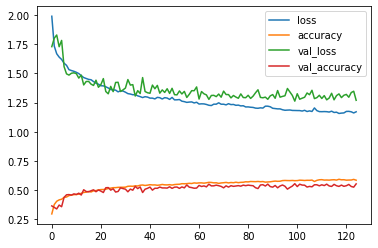

In [ ]:
pd.DataFrame(hst_dnn.history).plot()

In [ ]:
model_dnn.evaluate(x_test,y_test,verbose=2)

313/313 - 1s - loss: 1.2786 - accuracy: 0.5485 - 701ms/epoch - 2ms/step


[1.278633713722229, 0.5485000014305115]

313/313 - 1s - 661ms/epoch - 2ms/step


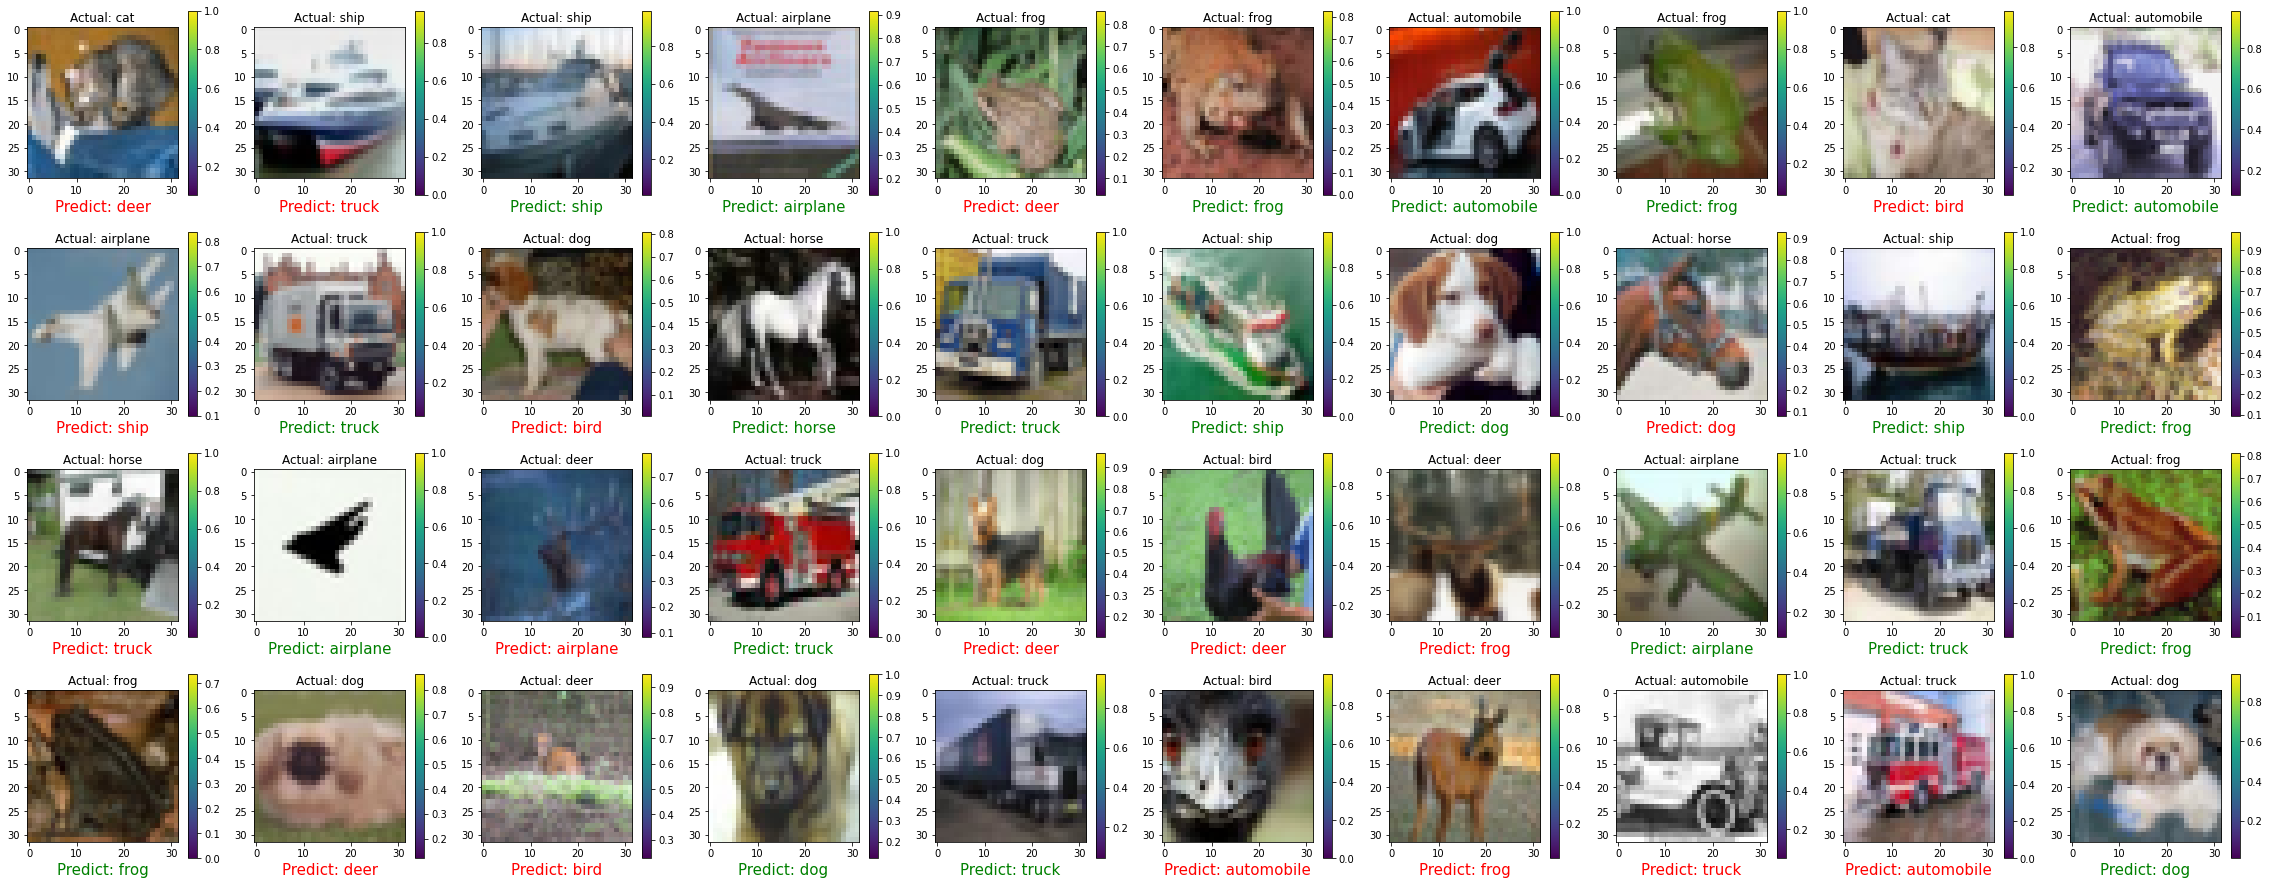

In [ ]:
predictions = model_dnn.predict(x_test,verbose=2)
i=0

fig = plt.figure(figsize=(40, 40))
for e in zip(y_test, predictions):
  fig.add_subplot(10, 10, i+1)
  plt.imshow(x_test[i])
  plt.colorbar()
  plt.grid(False)
  color = 'green' if class_names[np.argmax(y_test[i])] == class_names[np.argmax(predictions[i])] else "red"
  plt.title(f"Actual: {class_names[np.argmax(y_test[i])]}")
  plt.xlabel(f"Predict: {class_names[np.argmax(predictions[i])]}",color=color,fontsize=15)
  i+=1
  if i == 40:
    break

### CNN

In [ ]:
hst_cnn = model_cnn.fit(datagen.flow(x_train, y_train, batch_size = 64),
                    steps_per_epoch = len(x_train) // 64, 
                    epochs = 125, 
                    validation_data= (x_valid, y_valid))


Epoch 1/125
703/703 [==============================] - 26s 33ms/step - loss: 1.8914 - accuracy: 0.3110 - val_loss: 1.4329 - val_accuracy: 0.4684
Epoch 2/125
703/703 [==============================] - 20s 28ms/step - loss: 1.4316 - accuracy: 0.4827 - val_loss: 1.3820 - val_accuracy: 0.5034
Epoch 3/125
703/703 [==============================] - 18s 26ms/step - loss: 1.2341 - accuracy: 0.5705 - val_loss: 1.1285 - val_accuracy: 0.6014
Epoch 4/125
703/703 [==============================] - 18s 25ms/step - loss: 1.1125 - accuracy: 0.6178 - val_loss: 1.0356 - val_accuracy: 0.6336
Epoch 5/125
703/703 [==============================] - 18s 26ms/step - loss: 1.0199 - accuracy: 0.6546 - val_loss: 0.9251 - val_accuracy: 0.6810
Epoch 6/125
703/703 [==============================] - 18s 26ms/step - loss: 0.9646 - accuracy: 0.6787 - val_loss: 0.9586 - val_accuracy: 0.6886
Epoch 7/125
703/703 [==============================] - 22s 31ms/step - loss: 0.8958 - accuracy: 0.7040 - val_loss: 0.7550 - val_ac

<AxesSubplot:>

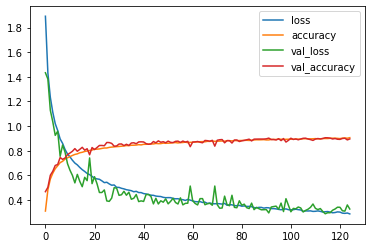

In [ ]:
pd.DataFrame(hst_cnn.history).plot()

In [ ]:
model_cnn.evaluate(x_test,y_test,verbose=2)

313/313 - 1s - loss: 0.3553 - accuracy: 0.8898 - 1s/epoch - 5ms/step


[0.35531318187713623, 0.8898000121116638]

313/313 - 2s - 2s/epoch - 5ms/step


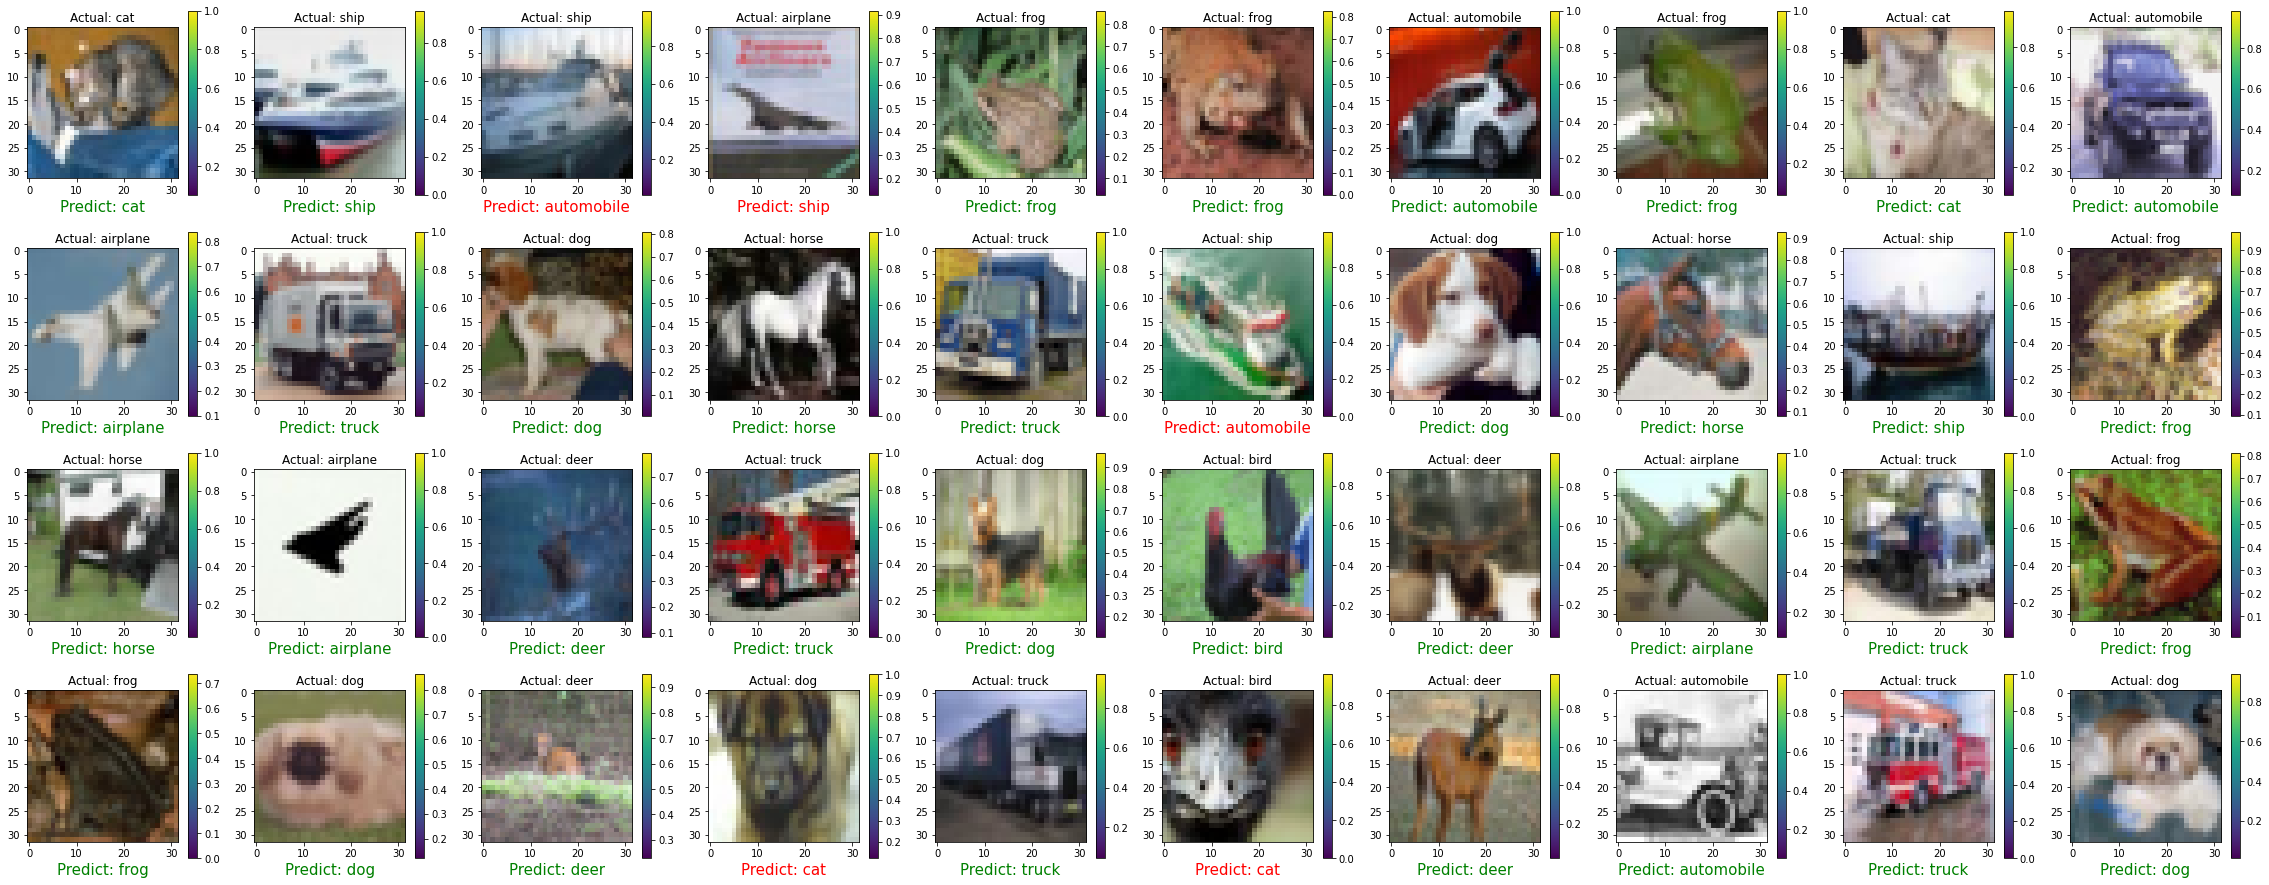

In [ ]:
predictions = model_cnn.predict(x_test,verbose=2)
i=0

fig = plt.figure(figsize=(40, 40))
for e in zip(y_test, predictions):
  fig.add_subplot(10, 10, i+1)
  plt.imshow(x_test[i])
  plt.colorbar()
  plt.grid(False)
  color = 'green' if class_names[np.argmax(y_test[i])] == class_names[np.argmax(predictions[i])] else "red"
  plt.title(f"Actual: {class_names[np.argmax(y_test[i])]}")
  plt.xlabel(f"Predict: {class_names[np.argmax(predictions[i])]}",color=color,fontsize=15)
  i+=1
  if i == 40:
    break